importing the Dependencies

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Importing the data into pandas dataframe

In [2]:
sms = pd.read_csv('spam.csv', encoding='latin-1')
sms.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


checking null values

In [3]:
sms.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [4]:
sms.dropna(how="any", inplace=True, axis=1)
sms.columns = ['label', 'message']
sms.head(10)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


 Exploratory Data Analysis (EDA)


In [5]:
sms.describe()

,label,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [6]:
sms.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

We have 4825 ham message and 747 spam message

In [7]:
# convert label to a numerical variable
sms['label_num'] = sms.label.map({'ham':0, 'spam':1})
sms.head()

,label,message,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [8]:
# adding a message length feature
sms['message_len'] = sms.message.apply(len)
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


Text(0.5, 0, 'Message Length')

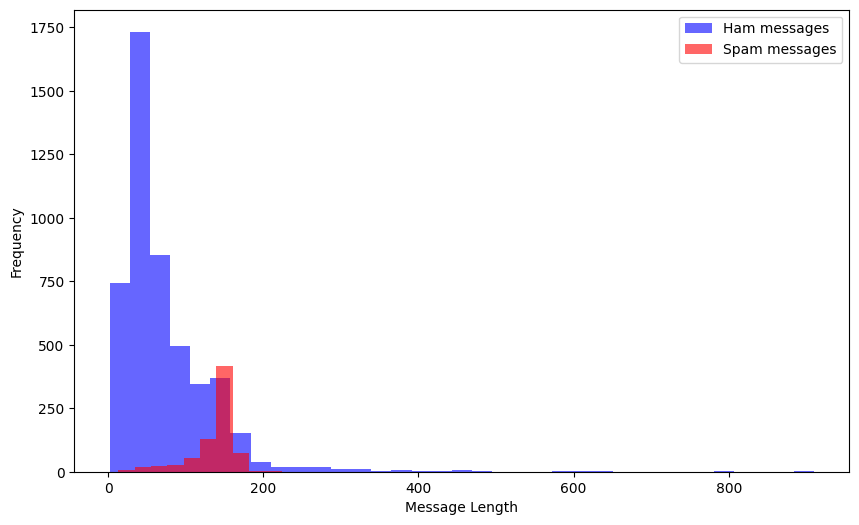

In [9]:
plt.figure(figsize=(10, 6))
sms[sms.label == 'ham'].message_len.plot(bins=35, kind='hist', color='blue', label='Ham messages', alpha=0.6)
sms[sms.label == 'spam'].message_len.plot(kind='hist', color='red', label='Spam messages', alpha=0.6)

plt.legend()
plt.xlabel('Message Length')

Spam messages tend to have more characters and Ham messages are more than Spam ones

In [10]:
sms[sms.label=='ham'].describe()

,label_num,message_len
count,4825.0,4825.000000
mean,0.0,71.023627
std,0.0,58.016023
min,0.0,2.000000
25%,0.0,33.000000
50%,0.0,52.000000
75%,0.0,92.000000
max,0.0,910.000000


In [11]:
sms[sms.label=='spam'].describe()

,label_num,message_len
count,747.0,747.000000
mean,1.0,138.866131
std,0.0,29.183082
min,1.0,13.000000
25%,1.0,132.500000
50%,1.0,149.000000
75%,1.0,157.000000
max,1.0,224.000000


In [12]:
sms[sms.message_len == 910].message.iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

##Text Pre-processing


In [13]:
#removing punctuations and stopwords

import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def text_process(text):

  text = text.lower()
  non_punc = [char for char in text if char not in string.punctuation]
  non_punc = ''.join(non_punc)

  STOPWORDS = stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure']
  lemmatizer = WordNetLemmatizer()

  cleaned_words = [lemmatizer.lemmatize(word) for word in non_punc.split() if word not in STOPWORDS]
  return ' '.join(cleaned_words)

In [14]:
sms.head()

,label,message,label_num,message_len
0,ham,"Go until jurong point, crazy.. Available only ...",0,111
1,ham,Ok lar... Joking wif u oni...,0,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155
3,ham,U dun say so early hor... U c already then say...,0,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61


In [15]:
sms['clean_msg'] = sms.message.apply(text_process)

sms.head()

,label,message,label_num,message_len,clean_msg
0,ham,"Go until jurong point, crazy.. Available only ...",0,111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,0,29,ok lar joking wif oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1,155,free entry wkly comp win fa cup final tkts 21s...
3,ham,U dun say so early hor... U c already then say...,0,49,dun say early hor c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",0,61,nah think go usf life around though


In [30]:
from collections import Counter

ham_messages = sms[sms.label == 'ham'].clean_msg.apply(lambda x: [word for word in x.split()])
c = Counter()

for msg in ham_messages:
  c.update(msg)

print(c.most_common(20))

[('get', 314), ('ltgt', 276), ('go', 273), ('ok', 272), ('come', 242), ('know', 241), ('call', 241), ('ill', 236), ('like', 232), ('got', 231), ('good', 223), ('day', 214), ('time', 213), ('love', 193), ('want', 183), ('need', 171), ('one', 170), ('going', 167), ('home', 160), ('lor', 160)]


In [35]:
spam_messages = sms[sms.label == 'spam'].clean_msg.apply(lambda x: [word for word in x.split()])
c_ = Counter()

for msg in spam_messages:
  c_.update(msg)

print(c_.most_common(20))

[('call', 359), ('free', 216), ('txt', 150), ('text', 137), ('mobile', 135), ('claim', 115), ('stop', 113), ('reply', 102), ('prize', 94), ('get', 83), ('tone', 73), ('service', 72), ('new', 69), ('send', 67), ('nokia', 65), ('urgent', 63), ('week', 62), ('cash', 62), ('win', 61), ('phone', 57)]


splitting the features and Labels and Vectorizing the cleaned texts

In [37]:
from sklearn.model_selection import train_test_split

X = sms.clean_msg
y = sms.label_num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer()

X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

##Building and evaluating a model

In [39]:
# Multinomial Naive Base
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

%time nb.fit(X_train_dtm, y_train)

CPU times: user 4.43 ms, sys: 945 µs, total: 5.37 ms
Wall time: 5.03 ms


MultinomialNB()

In [50]:
# Evaluating the model

from sklearn import metrics
y_pred = nb.predict(X_test_dtm)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_pred, y_test))
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred))

=======Accuracy Score===========
0.9730941704035875
=======Confision Matrix===========
[[976   0]
 [ 30 109]]


In [46]:
# printing the false negative
X_test[y_pred < y_test]

4674    hi babe chloe r smashed saturday night great w...
2582    3 free tarot text find love life try 3 free te...
3383    free msgwe billed mobile number mistake shortc...
3528    xmas new year eve ticket sale club day 10am ti...
689     forwarded 448712404000please call 08712404000 ...
1662    hi lookin saucy daytime fun wiv busty married ...
5035    wont believe true incredible txts reply g lear...
1125    taking part mobile survey yesterday 500 text u...
5110                1 new message please call 08715205273
1499    sm ac jsco energy high may know 2channel 2day ...
4247    accordingly repeat text word ok mobile phone send
3417    life never much fun great came made truly spec...
2773    come take little time child afraid dark become...
1960    guess somebody know secretly fancy wanna find ...
5       freemsg hey darling 3 week word back id like f...
517     credit topped httpwwwbubbletextcom renewal pin...
1373    bear pic nick tom pete dick fact type try gay ...
3753    bloomb

In [55]:
# logistic regression modeling
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()

%time logreg.fit(X_train_dtm, y_train)

CPU times: user 47.8 ms, sys: 0 ns, total: 47.8 ms
Wall time: 52.8 ms


LogisticRegression()

In [56]:
# Evaluating the model
y_pred = logreg.predict(X_test_dtm)
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred))

=======Accuracy Score===========
0.9704035874439462
=======Confision Matrix===========
[[973   3]
 [ 30 109]]


In [57]:
# Xgboost
from xgboost import XGBClassifier
xgb = XGBClassifier()

%time xgb.fit(X_train_dtm, y_train)

CPU times: user 2.74 s, sys: 2.51 ms, total: 2.75 s
Wall time: 2.12 s


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [58]:
# Evaluating the model
y_pred = xgb.predict(X_test_dtm)

print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred))

=======Accuracy Score===========
0.9713004484304932
=======Confision Matrix===========
[[971   5]
 [ 27 112]]


In [61]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga'],
    'max_iter': [50, 100, 200, 300, 500, 1000],
    'class_weight': [None, 'balanced']
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)

%time grid_search.fit(X_train_dtm, y_train)



CPU times: user 10.3 s, sys: 1.39 s, total: 11.7 s
Wall time: 13min 1s


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
3240 fits failed out of a total of 7200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
360 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: 

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'max_iter': [50, 100, 200, 300, 500, 1000],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']})

In [63]:
print("Best hyperparameters:", grid_search.best_params_)

Best hyperparameters: {'C': 0.1, 'class_weight': 'balanced', 'max_iter': 100, 'penalty': 'none', 'solver': 'saga'}


In [62]:
y_pred = grid_search.predict(X_test_dtm)
print("=======Accuracy Score===========")
print(metrics.accuracy_score(y_test, y_pred))

# print the confusion matrix
print("=======Confision Matrix===========")
print(metrics.confusion_matrix(y_test, y_pred))

=======Accuracy Score===========
0.9901345291479821
=======Confision Matrix===========
[[974   2]
 [  9 130]]


Using grid search we achieved a 99% accuracy which is a very solid result